1.	Feedforward Neural Networks 




Epoch 1/50

490/490 [==============================] - 2s 2ms/step - loss: 0.0282 - val_loss: 9.6735e-04
Epoch 2/50
490/490 [==============================] - 1s 1ms/step - loss: 0.3314 - val_loss: 7.9072e-04
Epoch 3/50
490/490 [==============================] - 1s 2ms/step - loss: 0.2708 - val_loss: 5.5932e-04
Epoch 4/50
490/490 [==============================] - 1s 1ms/step - loss: 0.1091 - val_loss: 5.5090e-04
Epoch 5/50
490/490 [==============================] - 1s 2ms/step - loss: 0.0737 - val_loss: 2.8489e-04
Epoch 6/50
490/490 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 4.0834e-04
Epoch 7/50
490/490 [==============================] - 1s 2ms/step - loss: 7.5340e-04 - val_loss: 2.4019e-04
Epoch 8/50
490/490 [==============================] - 1s 2ms/step - loss: 2.9583e-04 - val_loss: 1.7726e-04
Epoch 9/50
490/490 [==============================] - 1s 2ms/step - loss: 0.0012 - val_loss: 2.6160e-04
Epoch 10/50
490/490 [==============================]

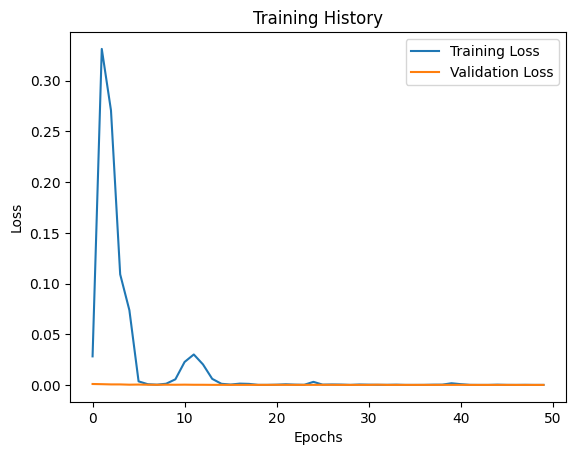

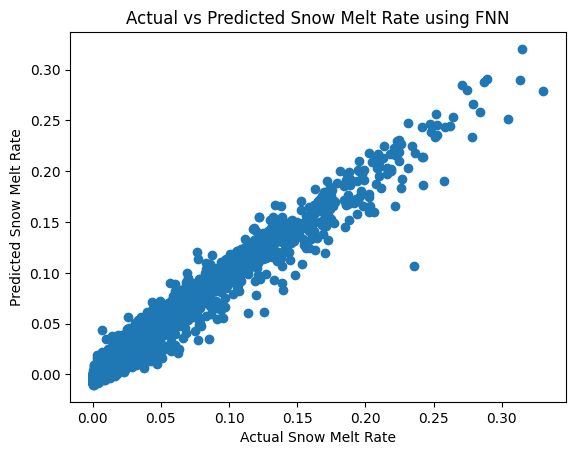

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the transformed data
file_path = r'D:\Fyp\Thesis\Excel_Files\Final_Parameters_Combined\Data_Rescaling\Daily_Averages_Transformed.csv'
df = pd.read_csv(file_path)

# Assume 'Date' is the first column, and the rest are features
features = df.columns[1:-1]  # Exclude the last column as it's the dependent variable

# Extract features and target variable
X = df[features]
y = df.iloc[:, -1]  # Use the last column as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Feedforward Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Snow Melt Rate')
plt.ylabel('Predicted Snow Melt Rate')
plt.title('Actual vs Predicted Snow Melt Rate using FNN')
plt.show()


2.	Convolutional Neural Networks (CNN)


Epoch 1/50
490/490 [==============================] - 3s 4ms/step - loss: 0.0019 - val_loss: 3.1843e-04
Epoch 2/50
490/490 [==============================] - 2s 3ms/step - loss: 0.1075 - val_loss: 3.0646e-04
Epoch 3/50
490/490 [==============================] - 2s 3ms/step - loss: 0.1580 - val_loss: 5.2299e-04
Epoch 4/50
490/490 [==============================] - 2s 3ms/step - loss: 0.1906 - val_loss: 2.1152e-04
Epoch 5/50
490/490 [==============================] - 2s 3ms/step - loss: 0.0976 - val_loss: 2.8874e-04
Epoch 6/50
490/490 [==============================] - 2s 3ms/step - loss: 0.4209 - val_loss: 3.1583e-04
Epoch 7/50
490/490 [==============================] - 2s 3ms/step - loss: 0.3047 - val_loss: 9.2036e-04
Epoch 8/50
490/490 [==============================] - 2s 3ms/step - loss: 0.2914 - val_loss: 7.9663e-04
Epoch 9/50
490/490 [==============================] - 2s 3ms/step - loss: 0.1944 - val_loss: 8.3775e-04
Epoch 10/50
490/490 [==============================] - 2s 3ms/s

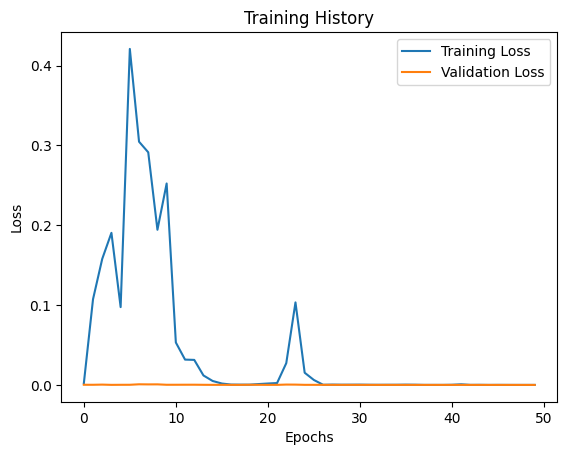

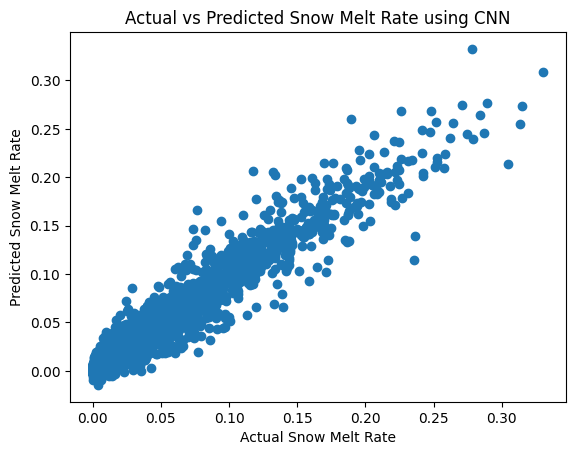

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the transformed data
file_path = r'D:\Fyp\Thesis\Excel_Files\Final_Parameters_Combined\Data_Rescaling\Daily_Averages_Transformed.csv'
df = pd.read_csv(file_path)

# Assume 'Date' is the first column, and the rest are features
features = df.columns[1:-1]  # Exclude the last column as it's the dependent variable

# Extract features and target variable
X = df[features]
y = df.iloc[:, -1]  # Use the last column as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN (assuming 1D image data)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the Convolutional Neural Network (CNN) model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test_reshaped).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Snow Melt Rate')
plt.ylabel('Predicted Snow Melt Rate')
plt.title('Actual vs Predicted Snow Melt Rate using CNN')
plt.show()


3.	Recurrent Neural Networks (RNN)

Epoch 1/50
490/490 [==============================] - 6s 11ms/step - loss: 0.0038 - val_loss: 5.7182e-04
Epoch 2/50
490/490 [==============================] - 5s 10ms/step - loss: 0.0155 - val_loss: 4.3334e-04
Epoch 3/50
490/490 [==============================] - 5s 11ms/step - loss: 0.0047 - val_loss: 4.0601e-04
Epoch 4/50
490/490 [==============================] - 5s 10ms/step - loss: 0.0591 - val_loss: 4.2295e-04
Epoch 5/50
490/490 [==============================] - 6s 12ms/step - loss: 3.7730e-04 - val_loss: 3.8493e-04
Epoch 6/50
490/490 [==============================] - 11s 23ms/step - loss: 8.3747e-04 - val_loss: 3.0739e-04
Epoch 7/50
490/490 [==============================] - 14s 28ms/step - loss: 0.0025 - val_loss: 2.6271e-04
Epoch 8/50
490/490 [==============================] - 11s 23ms/step - loss: 7.6317e-04 - val_loss: 2.4390e-04
Epoch 9/50
490/490 [==============================] - 10s 20ms/step - loss: 3.4520e-04 - val_loss: 2.3741e-04
Epoch 10/50
490/490 [==============

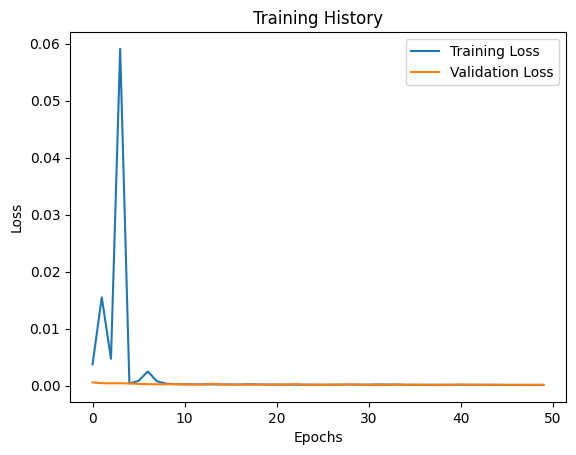

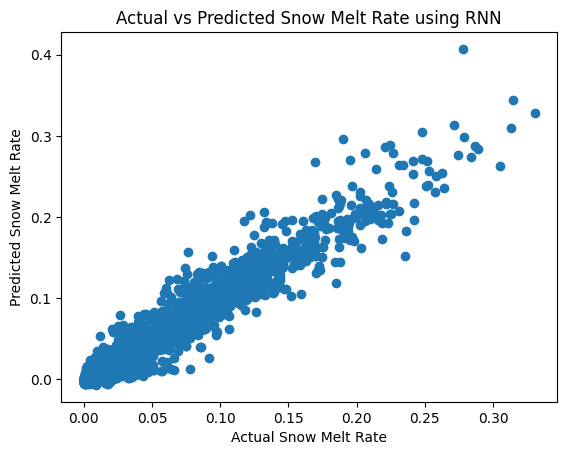

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the transformed data
file_path = r'D:\Fyp\Thesis\Excel_Files\Final_Parameters_Combined\Data_Rescaling\Daily_Averages_Transformed.csv'
df = pd.read_csv(file_path)

# Assume 'Date' is the first column, and the rest are features
features = df.columns[1:-1]  # Exclude the last column as it's the dependent variable

# Extract features and target variable
X = df[features]
y = df.iloc[:, -1]  # Use the last column as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN (assuming 1D sequential data)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the Recurrent Neural Network (RNN) model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    tf.keras.layers.Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test_reshaped).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Snow Melt Rate')
plt.ylabel('Predicted Snow Melt Rate')
plt.title('Actual vs Predicted Snow Melt Rate using RNN')
plt.show()


4.	Long Short-Term Memory (LSTM)

Epoch 1/50
490/490 [==============================] - 9s 11ms/step - loss: 0.0011 - val_loss: 4.7852e-04
Epoch 2/50
490/490 [==============================] - 5s 11ms/step - loss: 0.0030 - val_loss: 3.8195e-04
Epoch 3/50
490/490 [==============================] - 5s 11ms/step - loss: 0.0044 - val_loss: 3.8339e-04
Epoch 4/50
490/490 [==============================] - 5s 11ms/step - loss: 6.0140e-04 - val_loss: 3.0601e-04
Epoch 5/50
490/490 [==============================] - 6s 12ms/step - loss: 3.2870e-04 - val_loss: 2.8801e-04
Epoch 6/50
490/490 [==============================] - 6s 13ms/step - loss: 4.1139e-04 - val_loss: 2.9738e-04
Epoch 7/50
490/490 [==============================] - 7s 14ms/step - loss: 0.0024 - val_loss: 3.2673e-04
Epoch 8/50
490/490 [==============================] - 7s 14ms/step - loss: 0.0253 - val_loss: 0.0010
Epoch 9/50
490/490 [==============================] - 7s 15ms/step - loss: 4.1431e-04 - val_loss: 2.8938e-04
Epoch 10/50
490/490 [======================

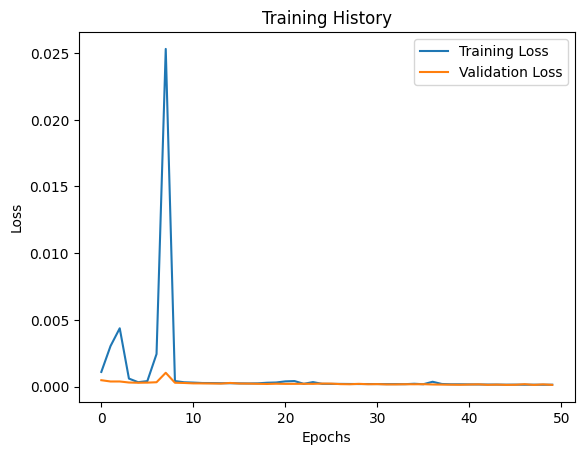

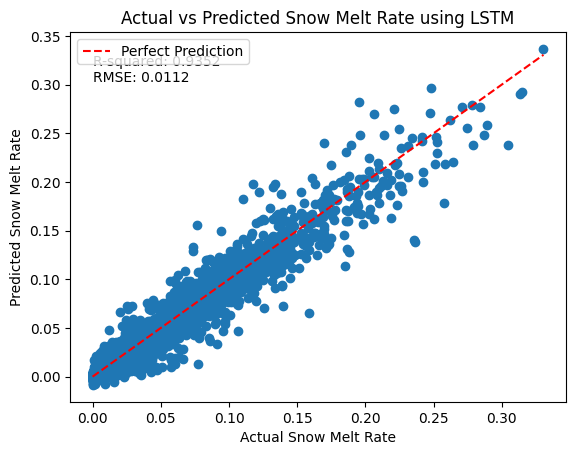

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the transformed data
file_path = r'D:\Fyp\Thesis\Excel_Files\Final_Parameters_Combined\Data_Rescaling\Daily_Averages_Transformed.csv'
df = pd.read_csv(file_path)

# Assume 'Date' is the first column, and the rest are features
features = df.columns[1:-1]  # Exclude the last column as it's the dependent variable

# Extract features and target variable
X = df[features]
y = df.iloc[:, -1]  # Use the last column as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM (assuming 1D sequential data)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the Long Short-Term Memory (LSTM) model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    tf.keras.layers.Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test_reshaped).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

# Plotting the results
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Snow Melt Rate')
plt.ylabel('Predicted Snow Melt Rate')
plt.title('Actual vs Predicted Snow Melt Rate using LSTM')
plt.legend()
plt.text(min(y_test), max(y_test), f'R-squared: {r2:.4f}\nRMSE: {np.sqrt(mse):.4f}', verticalalignment='top', horizontalalignment='left', color='black', fontsize=10)
plt.show()


5.	Gated Recurrent Unit (GRU)

Epoch 1/50
490/490 [==============================] - 8s 13ms/step - loss: 0.0038 - val_loss: 5.7112e-04
Epoch 2/50
490/490 [==============================] - 5s 11ms/step - loss: 0.0012 - val_loss: 2.8926e-04
Epoch 3/50
490/490 [==============================] - 7s 15ms/step - loss: 0.0035 - val_loss: 4.6087e-04
Epoch 4/50
490/490 [==============================] - 14s 28ms/step - loss: 0.0131 - val_loss: 2.4303e-04
Epoch 5/50
490/490 [==============================] - 13s 26ms/step - loss: 9.1224e-04 - val_loss: 2.3209e-04
Epoch 6/50
490/490 [==============================] - 13s 26ms/step - loss: 0.0016 - val_loss: 2.4404e-04
Epoch 7/50
490/490 [==============================] - 14s 29ms/step - loss: 2.5162e-04 - val_loss: 2.0758e-04
Epoch 8/50
490/490 [==============================] - 12s 25ms/step - loss: 9.4686e-04 - val_loss: 1.9922e-04
Epoch 9/50
490/490 [==============================] - 14s 29ms/step - loss: 0.0016 - val_loss: 2.2707e-04
Epoch 10/50
490/490 [================

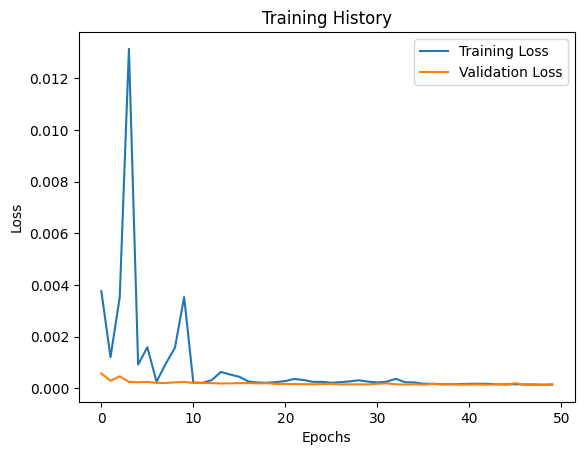

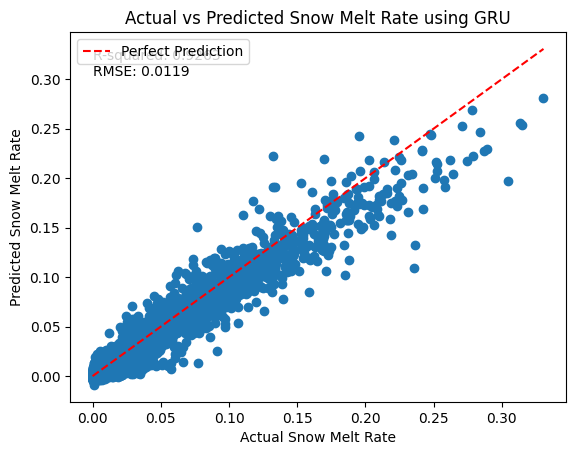

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the transformed data
file_path = r'D:\Fyp\Thesis\Excel_Files\Final_Parameters_Combined\Data_Rescaling\Daily_Averages_Transformed.csv'
df = pd.read_csv(file_path)

# Assume 'Date' is the first column, and the rest are features
features = df.columns[1:-1]  # Exclude the last column as it's the dependent variable

# Extract features and target variable
X = df[features]
y = df.iloc[:, -1]  # Use the last column as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU (assuming 1D sequential data)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the Gated Recurrent Unit (GRU) model
model = tf.keras.Sequential([
    tf.keras.layers.GRU(50, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    tf.keras.layers.Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test_reshaped).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

# Plotting the results
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Snow Melt Rate')
plt.ylabel('Predicted Snow Melt Rate')
plt.title('Actual vs Predicted Snow Melt Rate using GRU')
plt.legend()
plt.text(min(y_test), max(y_test), f'R-squared: {r2:.4f}\nRMSE: {np.sqrt(mse):.4f}', verticalalignment='top', horizontalalignment='left', color='black', fontsize=10)
plt.show()


Combination of Feedforward Neural Network (FNN) and a Long Short-Term Memory (LSTM) model

Epoch 1/50
490/490 [==============================] - 3s 4ms/step - loss: 0.8721 - val_loss: 0.0077
Epoch 2/50
490/490 [==============================] - 1s 3ms/step - loss: 0.2540 - val_loss: 0.0049
Epoch 3/50
490/490 [==============================] - 1s 2ms/step - loss: 0.0186 - val_loss: 0.0040
Epoch 4/50
490/490 [==============================] - 1s 2ms/step - loss: 0.0064 - val_loss: 0.0029
Epoch 5/50
490/490 [==============================] - 1s 2ms/step - loss: 0.0045 - val_loss: 0.0023
Epoch 6/50
490/490 [==============================] - 2s 4ms/step - loss: 0.0049 - val_loss: 0.0020
Epoch 7/50
490/490 [==============================] - 2s 4ms/step - loss: 0.0122 - val_loss: 0.0018
Epoch 8/50
490/490 [==============================] - 3s 6ms/step - loss: 0.0642 - val_loss: 0.0017
Epoch 9/50
490/490 [==============================] - 3s 5ms/step - loss: 0.1922 - val_loss: 0.0015
Epoch 10/50
490/490 [==============================] - 3s 5ms/step - loss: 0.0868 - val_loss: 0.0014

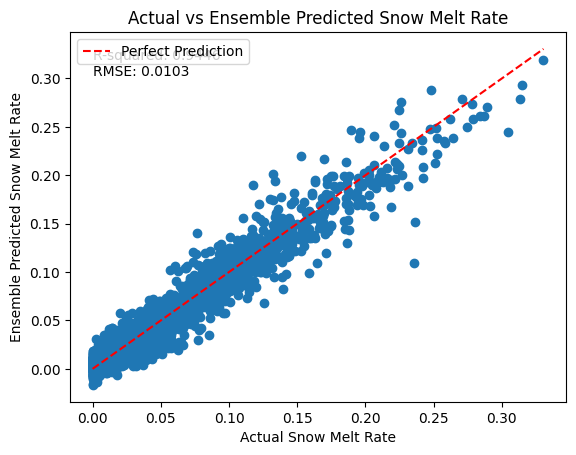

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the transformed data
file_path = r'D:\Fyp\Thesis\Excel_Files\Final_Parameters_Combined\Data_Rescaling\Daily_Averages_Transformed.csv'
df = pd.read_csv(file_path)

# Assume 'Date' is the first column, and the rest are features
features = df.columns[1:-1]  # Exclude the last column as it's the dependent variable

# Extract features and target variable
X = df[features]
y = df.iloc[:, -1]  # Use the last column as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM (assuming 1D sequential data)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the Feedforward Neural Network (FNN) model
fnn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1)  # Output layer for regression task
])

# Compile the FNN model
fnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the FNN model
fnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Build the Long Short-Term Memory (LSTM) model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    tf.keras.layers.Dense(1)  # Output layer for regression task
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set with both models
fnn_pred = fnn_model.predict(X_test_scaled).flatten()
lstm_pred = lstm_model.predict(X_test_reshaped).flatten()

# Average predictions from both models
ensemble_pred = (fnn_pred + lstm_pred) / 2

# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, ensemble_pred)
r2_ensemble = r2_score(y_test, ensemble_pred)

print(f'Ensemble Model Mean Squared Error: {mse_ensemble}')
print(f'Ensemble Model R-squared: {r2_ensemble}')

# Plotting the results
plt.scatter(y_test, ensemble_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Snow Melt Rate')
plt.ylabel('Ensemble Predicted Snow Melt Rate')
plt.title('Actual vs Ensemble Predicted Snow Melt Rate')
plt.legend()
plt.text(min(y_test), max(y_test), f'R-squared: {r2_ensemble:.4f}\nRMSE: {np.sqrt(mse_ensemble):.4f}', verticalalignment='top', horizontalalignment='left', color='black', fontsize=10)
plt.show()


Combo of Random Forest Regressor, Gradient Boosting Regressor, and Long Short-Term Memory (LSTM) models

Epoch 1/50
490/490 [==============================] - 8s 13ms/step - loss: 0.0028 - val_loss: 7.8453e-04
Epoch 2/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0076 - val_loss: 4.1406e-04
Epoch 3/50
490/490 [==============================] - 6s 13ms/step - loss: 3.9063e-04 - val_loss: 3.9474e-04
Epoch 4/50
490/490 [==============================] - 6s 13ms/step - loss: 3.2772e-04 - val_loss: 3.2419e-04
Epoch 5/50
490/490 [==============================] - 6s 12ms/step - loss: 3.1350e-04 - val_loss: 2.5969e-04
Epoch 6/50
490/490 [==============================] - 6s 12ms/step - loss: 2.7850e-04 - val_loss: 2.8473e-04
Epoch 7/50
490/490 [==============================] - 6s 12ms/step - loss: 2.8336e-04 - val_loss: 2.2027e-04
Epoch 8/50
490/490 [==============================] - 6s 12ms/step - loss: 2.9607e-04 - val_loss: 2.1061e-04
Epoch 9/50
490/490 [==============================] - 6s 12ms/step - loss: 2.5243e-04 - val_loss: 2.0825e-04
Epoch 10/50
490/490 [======

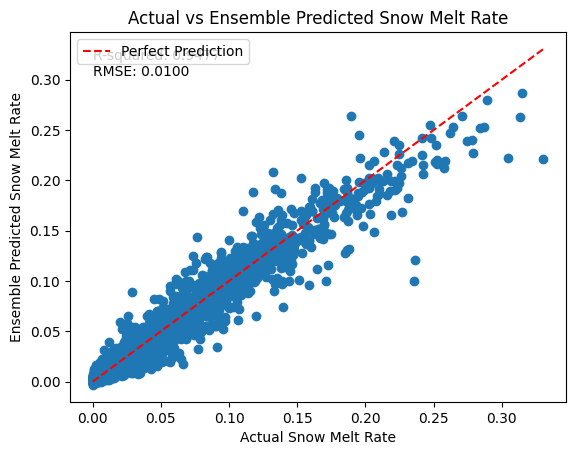

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load the transformed data
file_path = r'D:\Fyp\Thesis\Excel_Files\Final_Parameters_Combined\Data_Rescaling\Daily_Averages_Transformed.csv'
df = pd.read_csv(file_path)

# Assume 'Date' is the first column, and the rest are features
features = df.columns[1:-1]  # Exclude the last column as it's the dependent variable

# Extract features and target variable
X = df[features]
y = df.iloc[:, -1]  # Use the last column as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Build and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Build the Long Short-Term Memory (LSTM) model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    tf.keras.layers.Dense(1)  # Output layer for regression task
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape data for LSTM (assuming 1D sequential data)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Train the LSTM model
lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set with all three models
rf_pred = rf_model.predict(X_test_scaled)
gb_pred = gb_model.predict(X_test_scaled)
lstm_pred = lstm_model.predict(X_test_reshaped).flatten()

# Average predictions from all three models
ensemble_pred = (rf_pred + gb_pred + lstm_pred) / 3

# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, ensemble_pred)
r2_ensemble = r2_score(y_test, ensemble_pred)

print(f'Ensemble Model Mean Squared Error: {mse_ensemble}')
print(f'Ensemble Model R-squared: {r2_ensemble}')

# Plotting the results
plt.scatter(y_test, ensemble_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Snow Melt Rate')
plt.ylabel('Ensemble Predicted Snow Melt Rate')
plt.title('Actual vs Ensemble Predicted Snow Melt Rate')
plt.legend()
plt.text(min(y_test), max(y_test), f'R-squared: {r2_ensemble:.4f}\nRMSE: {np.sqrt(mse_ensemble):.4f}', verticalalignment='top', horizontalalignment='left', color='black', fontsize=10)
plt.show()
